# **CSE 435/535 Project 2 Recitation**



## Announcements & Reminders


1.   Project 2 dry run: **19th October 2020, 11:59 PM EST**
2.   Automated grader script will start at **12:00 AM EST**
3.   **No regrading request** will be entertained in case of late submission
4.   Do avail this opportunity of getting feedback before the final submission
5.   Project 2 submission due date: **21st October 2020, 11:59 PM EST**
6.   You **can use NLTK** for stemming & stopword removal







## Preprocessing examples
###Example 1###

**Doc id**: 38604	

**Doc text**: Management of ophthalmic perioperative period during 2019 novel coronavirus disease outbreak/ 新型冠状病毒肺炎疫情下眼科患者围手术期管理实践

**Doc tokens**: ['manag', 'ophthalm', 'periop', 'period', '2019', 'novel', 'coronaviru', 'diseas', 'outbreak']



###Example 2###
**Doc id**: 8413	

**Doc text**: "Tomar o no tomar «decisiones en caliente¼ respecto al tratamiento de la infección por SARS-CoV-2./ [Whether to make decisions ""on the fly"" regarding treatment for SARS-CoV-2 infection]"

**Doc tokens**: ['tomar', 'tomar', 'decision', 'en', 'calient', 'respecto', 'al', 'tratamiento', 'de', 'la', 'infecci', 'n', 'por', 'sar', 'cov', '2', 'whether', 'make', 'decis', 'fli', 'regard', 'treatment', 'sar', 'cov', '2', 'infect']



###Example 3###
**Doc id**: 55745	

**Doc text**: "Aufgaben und Funktion der Ständigen Arbeitsgemeinschaft der Kompetenz- und Behandlungszentren für hochkontagiöse, lebensbedrohliche Erkrankungen"

**Doc tokens**: ['aufgaben', 'und', 'funktion', 'der', 'st', 'ndigen', 'arbeitsgemeinschaft', 'der', 'kompetenz', 'und', 'behandlungszentren', 'f', 'r', 'hochkontagi', 'se', 'lebensbedrohlich', 'erkrankungen']


# Linked Lists for creating Postings lists in Python 3

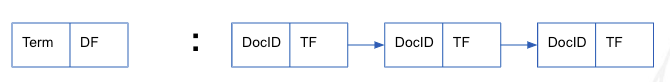

### Why bother with linked lists?

1. **Efficiency**: Faster inserts. Contigious memory not required. 
2. **Control**: Each node in the linked list can be a complex data structure. Nested linked lists.
3. **Learning**: Desired from a learning point of view, where you can get a feel of the considerations to keep in mind, and the bottlenecks while creating postings lists.

Reference:https://www.quora.com/What-is-the-purpose-of-using-a-linked-list-in-Python

### Linked List Demonstration

In [6]:
# The data structure for every element in the linked list. 
class Node:
    def __init__(self, value = None, next = None):
        self.value = value
        self.next = next

In [2]:
#The linked list
class LinkedList:

    def __init__(self, index=0, mode="simple"):
        self.start_node = None # Head pointer
        self.end_node = None # Tail pointer
        # Additional attributes
        self.index = index 
        self.mode = "simple"

    # Method to traverse a created linked list
    def traverse_list(self):
        traversal = []
        if self.start_node is None:
            print("List has no element")
            return
        else:
            n = self.start_node
            # Start traversal from head, and go on till you reach None
            while n is not None:
                traversal.append(n.value)
                n = n.next
            return traversal

    # Method to insert elements in the linked list
    def insert_at_end(self, value):
        # determine data type of the value
        if 'list' in str(type(value)):
            self.mode = "list"

        # Initialze a linked list element of type "Node" 
        new_node = Node(value)
        n = self.start_node # Head pointer

        # If linked list is empty, insert element at head
        if self.start_node is None:
            self.start_node = new_node
            self.end_node = new_node
            return "Inserted"
        
        elif self.mode == "list":
            if self.start_node.value[self.index] >= value[self.index]:
                self.start_node = new_node
                self.start_node.next = n
                return "Inserted"

            elif self.end_node.value[self.index] <= value[self.index]:
                self.end_node.next = new_node
                self.end_node = new_node
                return "Inserted"

            else:
                while value[self.index] > n.value[self.index] and value[self.index] < self.end_node.value[self.index] and n.next is not None:
                    n = n.next

                m = self.start_node
                while m.next != n and m.next is not None:
                    m = m.next
                m.next = new_node
                new_node.next = n
                return "Inserted"
        else:
            # If element to be inserted has lower value than head, insert new element at head
            if self.start_node.value >= value:
                self.start_node = new_node
                self.start_node.next = n
                return "Inserted"

            # If element to be inserted has higher value than tail, insert new element at tail
            elif self.end_node.value <= value:
                self.end_node.next = new_node
                self.end_node = new_node
                return "Inserted"

            # If element to be inserted lies between head & tail, find the appropriate position to insert it
            else:
                while value > n.value and value < self.end_node.value and n.next is not None:
                    n = n.next

                m = self.start_node
                while m.next != n and m.next is not None:
                    m = m.next
                m.next = new_node
                new_node.next = n
                return "Inserted"


### Linked list of integers

In [7]:
linked_list = LinkedList() #Initialize
print(linked_list)

In [8]:
#The list is empty
linked_list.traverse_list()

List has no element


In [9]:
#Insert one integer in the list
linked_list.insert_at_end(33)
linked_list.traverse_list()

[33]

In [10]:
#Note how start_node & end_node have same memory location
linked_list.start_node, linked_list.end_node

(<__main__.Node at 0x7f241a5021d0>, <__main__.Node at 0x7f241a5021d0>)

In [11]:
#Let's insert a few more elements
[linked_list.insert_at_end(i) for i in [42, 111, 13, 29, 7, -11]]

['Inserted', 'Inserted', 'Inserted', 'Inserted', 'Inserted', 'Inserted']

In [12]:
#Already sorted!
linked_list.traverse_list()

[-11, 7, 13, 29, 33, 42, 111]

In [13]:
#Note how start_node & end_node refer to different locations now
linked_list.start_node, linked_list.end_node

(<__main__.Node at 0x7f241a5025c0>, <__main__.Node at 0x7f241a502438>)

In [14]:
print("Mode :",linked_list.mode,",", "Index :",linked_list.index)

Mode : simple , Index : 0


### Linked list of lists

In [20]:
linked_list2 = LinkedList(index = 1)

#Student -> age, name, marks
student1 = [22, 'Max', 87]
student2 = [26, 'Alice', 77]
student3 = [21, 'Bob', 95]
student4 = [23, 'Kenny', 100]
student5 = [22, 'Keith', 78]

In [21]:
print("Mode :",linked_list2.mode,",", "Index :",linked_list2.index)

Mode : simple , Index : 1


In [22]:
#Let's insert the elements
[linked_list2.insert_at_end(i) for i in [student1, student2, student3, student4, student5]]

['Inserted', 'Inserted', 'Inserted', 'Inserted', 'Inserted']

In [23]:
#Already sorted by index 0: age !
linked_list2.traverse_list()

[[26, 'Alice', 77],
 [21, 'Bob', 95],
 [22, 'Keith', 78],
 [23, 'Kenny', 100],
 [22, 'Max', 87]]

In [24]:
# Data type is detected during insertion and set to appropriate mode
linked_list2.mode

'list'